<a href="https://colab.research.google.com/github/asrask65/INSE-6220/blob/master/Asra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
!pip install pycaret==2.3.6

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [342]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [343]:
df = pd.read_csv('Abalone-6.csv')
df.head(25)

class  Length   Diameter   Height   Whole weigh  Shucked weight  \
0     Male     0.46       0.37     0.10         0.51            0.22   
1     Male     0.35       0.27     0.09         0.23            0.10   
2   Female     0.53       0.42     0.14         0.68            0.26   
3     Male     0.44       0.37     0.13         0.52            0.22   
4   Infant     0.33       0.26     0.08         0.21            0.09   
5   Infant     0.43       0.30     0.10         0.35            0.14   
6   Female     0.53       0.42     0.15         0.78            0.24   
7   Female     0.55       0.43     0.13         0.77            0.29   
8     Male     0.48       0.37     0.13         0.51            0.22   
9   Female     0.55       0.44     0.15         0.89            0.31   
10  Female     0.53       0.38     0.14         0.61            0.19   
11    Male     0.43       0.35     0.11         0.41            0.17   
12    Male     0.49       0.38     0.14         0.54            0.22   
13  Female     0.54       0.41     0.15         0.68            0.27   
14  Female     0.47       0.36     0.10         0.48            0.17   
15    Male     0.50       0.40     0.13         0.66            0.26   
16  Infant     0.36       0.28     0.09         0.29            0.10   
17  Female     0.44       0.34     0.10         0.45            0.19   
18    Male     0.37       0.30     0.08         0.26            0.10   
19    Male     0.45       0.32     0.10         0.38            0.17   
20    Male     0.36       0.28     0.10         0.25            0.10   
21  Infant     0.38       0.28     0.10         0.23            0.08   
22  Female     0.57       0.44     0.16         0.94            0.43   
23  Female     0.55       0.42     0.14         0.76            0.32   
24  Female     0.62       0.48     0.17         1.16            0.51   

    Viscera weight  Shell weight  
0             0.10          0.15  
1             0.05          0.07  
2             0.14          0.21  
3             0.11          0.16  
4             0.04          0.06  
5             0.08          0.12  
6             0.14          0.33  
7             0.15          0.26  
8             0.11          0.17  
9             0.15          0.32  
10            0.15          0.21  
11            0.08          0.14  
12            0.10          0.19  
13            0.17          0.21  
14            0.08          0.19  
15            0.13          0.24  
16            0.04          0.12  
17            0.09          0.13  
18            0.04          0.10  
19            0.08          0.12  
20            0.06          0.08  
21            0.05          0.09  
22            0.21          0.27  
23            0.21          0.20  
24            0.30          0.31

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           113 non-null    object 
 1   Length          113 non-null    float64
 2   Diameter        113 non-null    float64
 3   Height          113 non-null    float64
 4   Whole weigh     113 non-null    float64
 5   Shucked weight  113 non-null    float64
 6   Viscera weight  113 non-null    float64
 7   Shell weight    113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


In [345]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [311]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


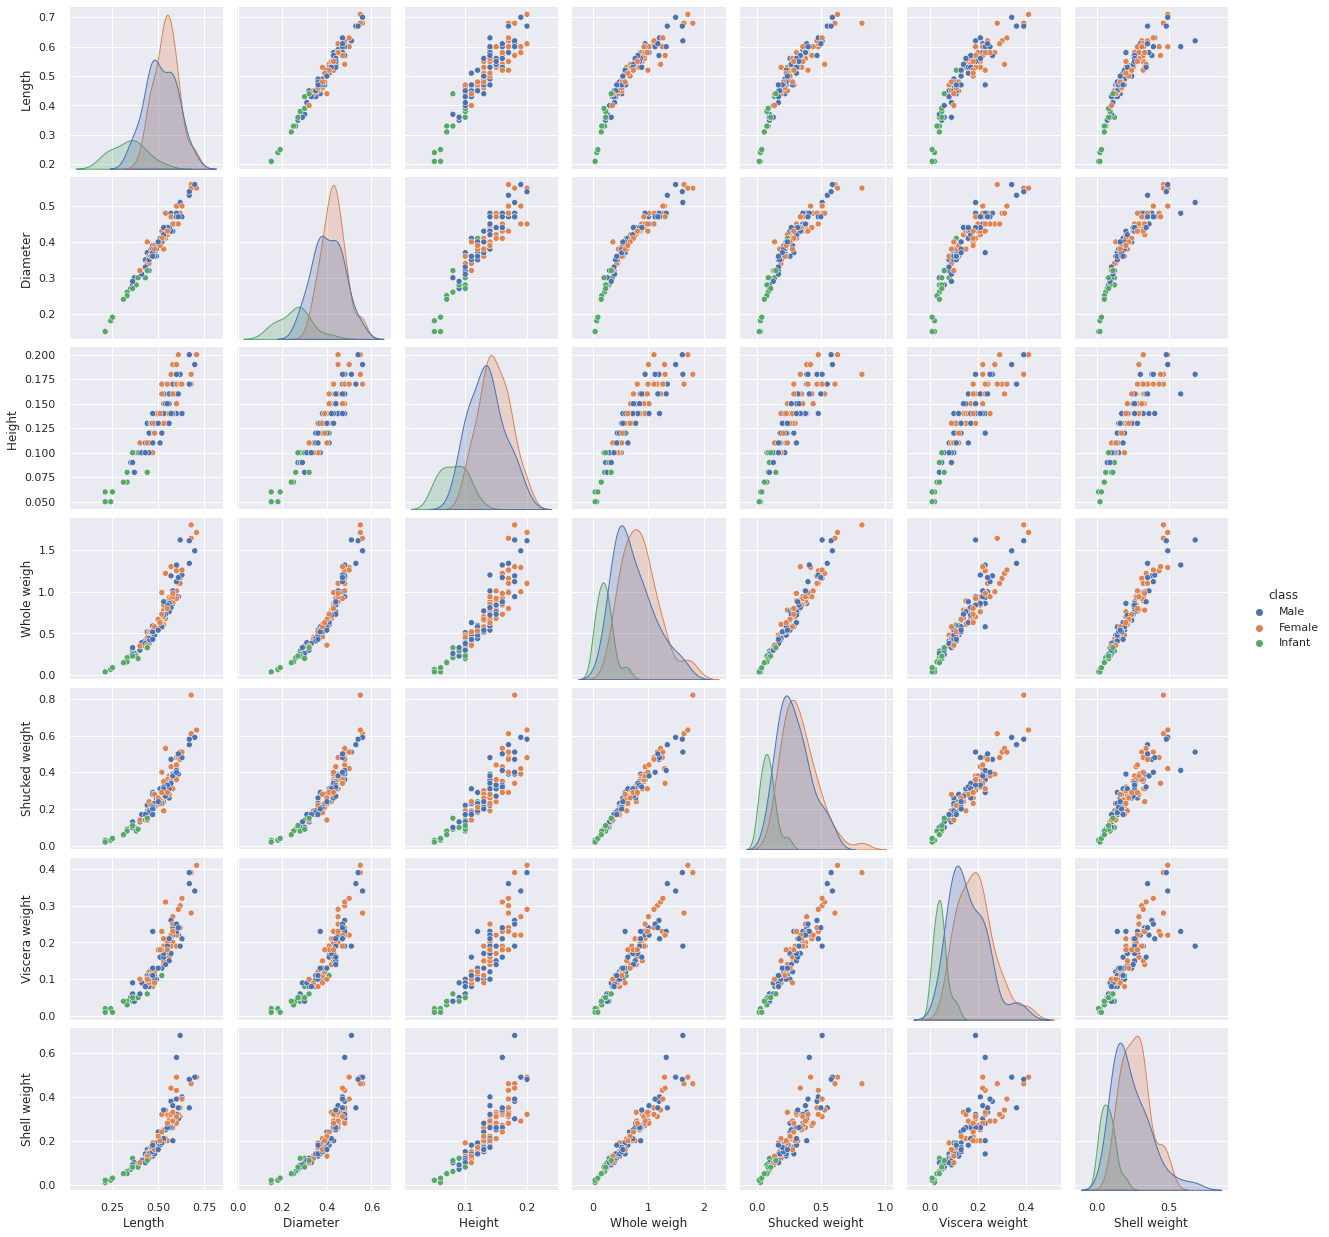

In [346]:
sns.pairplot(df, hue='class')
plt.show()

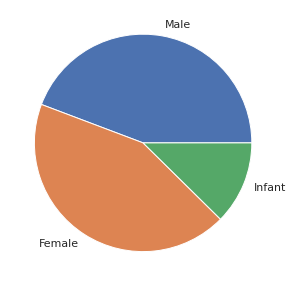

In [347]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [348]:
X = df.drop(columns=['class'])
X.head(10)

Length   Diameter   Height   Whole weigh  Shucked weight  Viscera weight  \
0     0.46       0.37     0.10         0.51            0.22            0.10   
1     0.35       0.27     0.09         0.23            0.10            0.05   
2     0.53       0.42     0.14         0.68            0.26            0.14   
3     0.44       0.37     0.13         0.52            0.22            0.11   
4     0.33       0.26     0.08         0.21            0.09            0.04   
5     0.43       0.30     0.10         0.35            0.14            0.08   
6     0.53       0.42     0.15         0.78            0.24            0.14   
7     0.55       0.43     0.13         0.77            0.29            0.15   
8     0.48       0.37     0.13         0.51            0.22            0.11   
9     0.55       0.44     0.15         0.89            0.31            0.15   

   Shell weight  
0          0.15  
1          0.07  
2          0.21  
3          0.16  
4          0.06  
5          0.12  
6          0.33  
7          0.26  
8          0.17  
9          0.32

In [349]:
X.describe().transpose()

count      mean       std   min   25%   50%   75%   max
Length          113.0  0.505841  0.100425  0.21  0.45  0.52  0.58  0.71
Diameter        113.0  0.397257  0.082929  0.15  0.36  0.41  0.45  0.56
Height          113.0  0.133451  0.033402  0.05  0.11  0.14  0.16  0.20
Whole weigh     113.0  0.720619  0.384910  0.04  0.45  0.67  0.94  1.80
Shucked weight  113.0  0.286991  0.146695  0.02  0.19  0.27  0.38  0.82
Viscera weight  113.0  0.159115  0.085904  0.01  0.10  0.15  0.22  0.41
Shell weight    113.0  0.230708  0.126680  0.01  0.14  0.21  0.31  0.68

In [350]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length   Diameter    Height   Whole weigh  Shucked weight  Viscera weight  \
0 -0.458499  -0.330138 -1.005953    -0.549629       -0.458704       -0.691214   
1 -1.558721  -1.541359 -1.306674    -1.280311       -1.280371       -1.275849   
2  0.241642   0.275472  0.196933    -0.106000       -0.184815       -0.223506   
3 -0.658540  -0.330138 -0.103789    -0.523533       -0.458704       -0.574287   
4 -1.758761  -1.662482 -1.607395    -1.332503       -1.348843       -1.392776   
5 -0.758560  -1.177993 -1.005953    -0.967162       -1.006482       -0.925068   
6  0.241642   0.275472  0.497654     0.154958       -0.321759       -0.223506   
7  0.441682   0.396595 -0.103789     0.128862        0.020602       -0.106579   
8 -0.258459  -0.330138 -0.103789    -0.549629       -0.458704       -0.574287   
9  0.441682   0.517717  0.497654     0.442012        0.157547       -0.106579   

   Shell weight  
0     -0.639941  
1     -1.274269  
2     -0.164195  
3     -0.560650  
4     -1.353560  
5     -0.877814  
6      0.787296  
7      0.232259  
8     -0.481359  
9      0.708005

In [351]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Length          113.0 -2.161496e-16  1.004454 -2.959003 -0.558520  0.141621   
Diameter        113.0  1.542522e-16  1.004454 -2.994825 -0.451260  0.154350   
Height          113.0  3.438744e-16  1.004454 -2.509559 -0.705231  0.196933   
Whole weigh     113.0  1.021798e-16  1.004454 -1.776132 -0.706203 -0.132096   
Shucked weight  113.0  1.011973e-16  1.004454 -1.828149 -0.664120 -0.116342   
Viscera weight  113.0  8.449485e-17  1.004454 -1.743557 -0.691214 -0.106579   
Shell weight    113.0 -1.404973e-16  1.004454 -1.750015 -0.719232 -0.164195   

                     75%       max  
Length          0.741742  2.042004  
Diameter        0.638839  1.971182  
Height          0.798375  2.001260  
Whole weigh     0.572491  2.816731  
Shucked weight  0.636853  3.649633  
Viscera weight  0.711909  2.933522  
Shell weight    0.628714  3.562480

In [299]:
observations = list(df.index)
variables = list(df.columns)

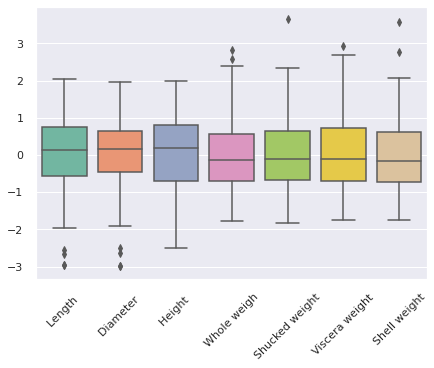

In [352]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

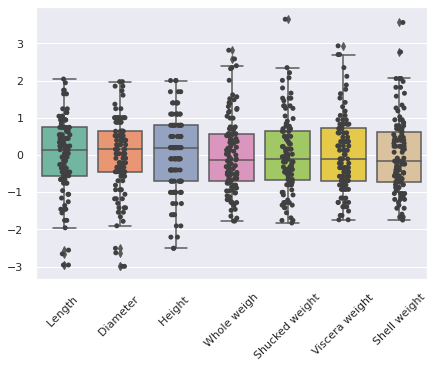

In [353]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

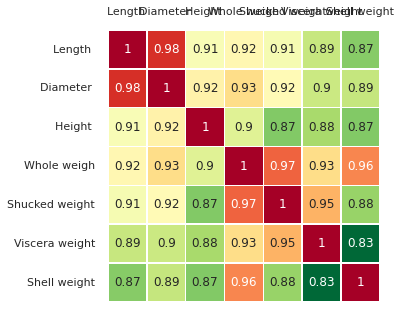

In [354]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

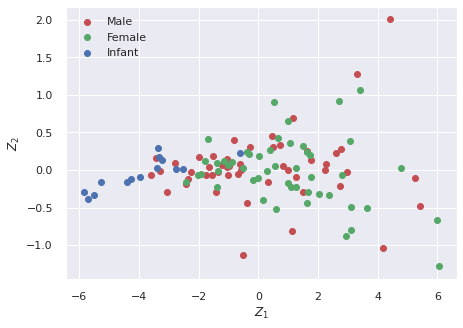

In [355]:
# Principal Component Analysis (PCA)
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_4 = np.where(y == 'Male')
idx_5 = np.where(y == 'Female')
idx_6 = np.where(y == 'Infant')


plt. figure()
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

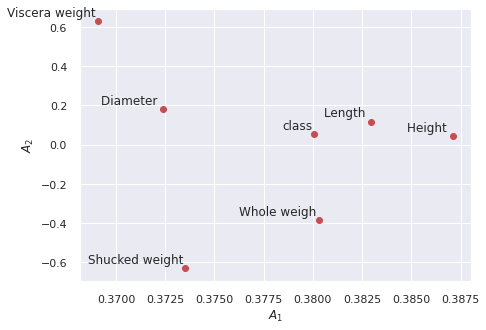

In [356]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

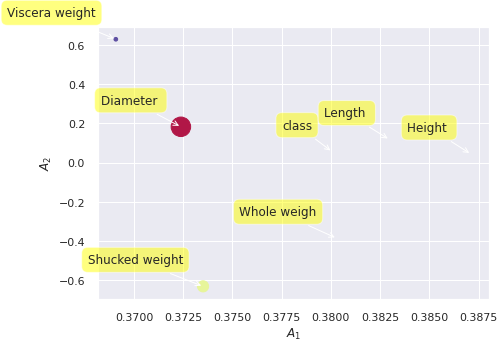

In [357]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

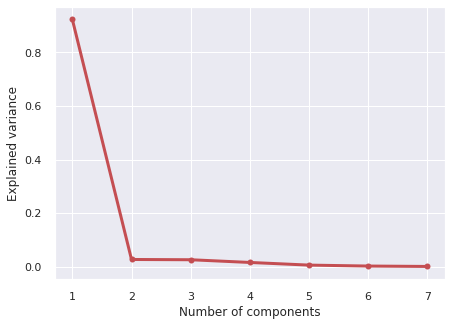

In [358]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

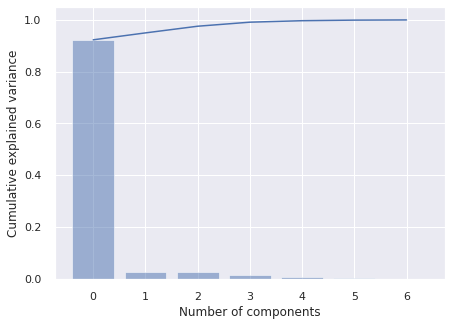

In [359]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

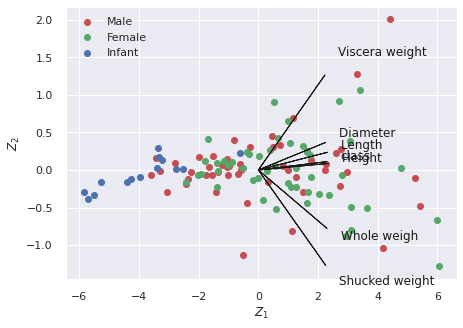

In [360]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend(loc='upper left')

In [361]:
!pip install pca

In [362]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [363]:
out['PC']

PC1       PC2       PC3
0   -1.556871 -0.060255  0.032011
1   -3.598695 -0.062160  0.236794
2    0.015271  0.186719 -0.492352
3   -1.213907  0.070560 -0.193770
4   -3.952275 -0.094191  0.409654
..        ...       ...       ...
108 -0.183118 -0.139297 -0.362839
109 -1.800132  0.121327 -0.525371
110 -0.687033 -0.052140 -0.521951
111 -1.532808  0.185382 -0.144931
112 -2.744669  0.008826  0.085964

[113 rows x 3 columns]

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb887773d0>)

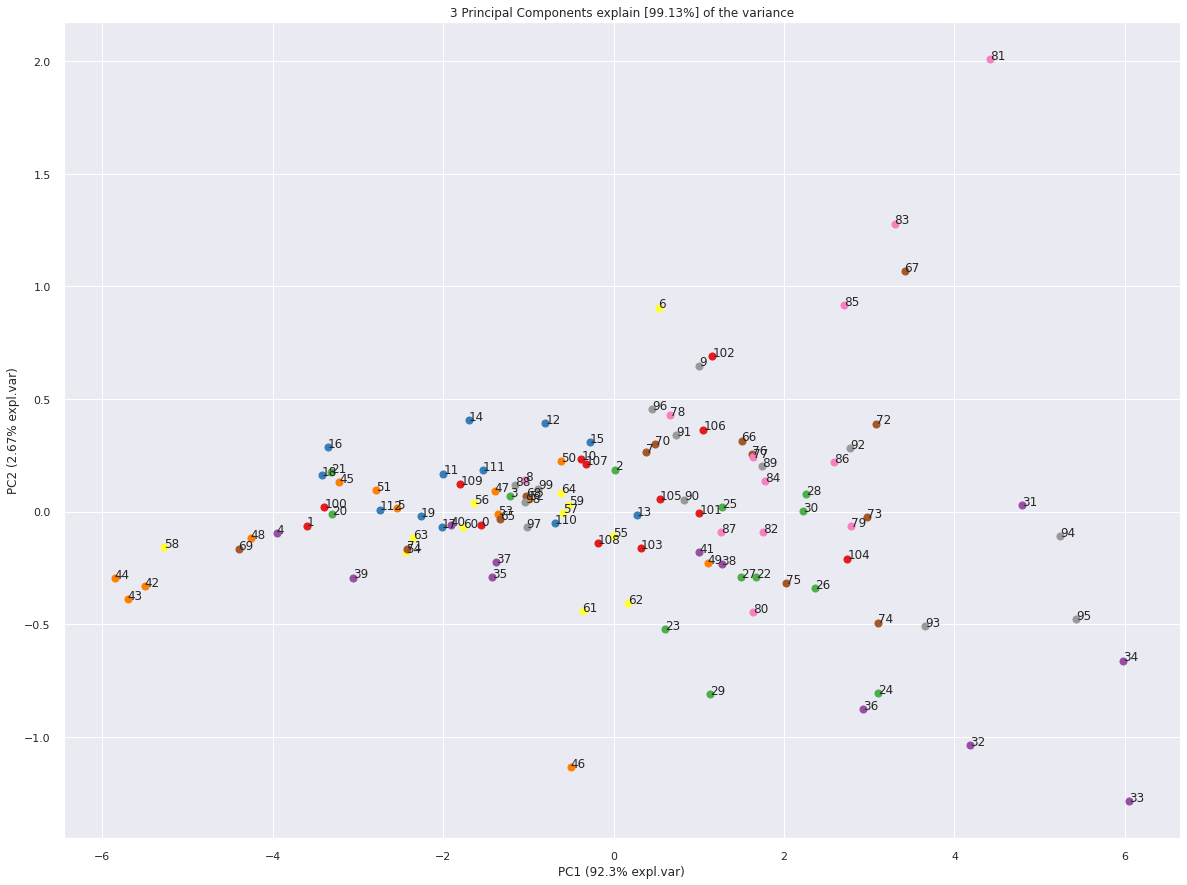

In [364]:
model.scatter(label=True, legend=False)

In [365]:
A = out['loadings'].T

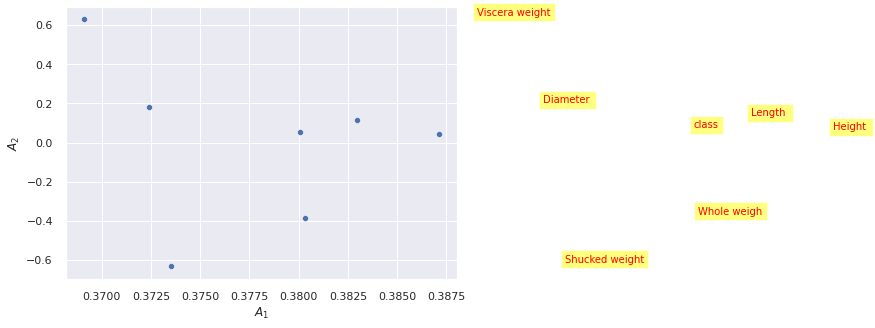

In [366]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

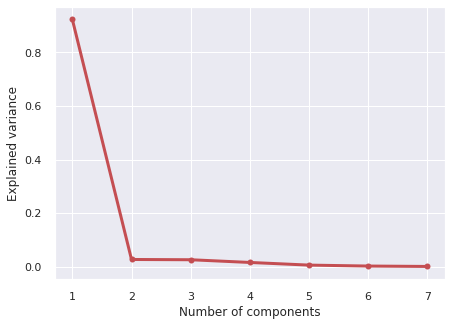

In [367]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

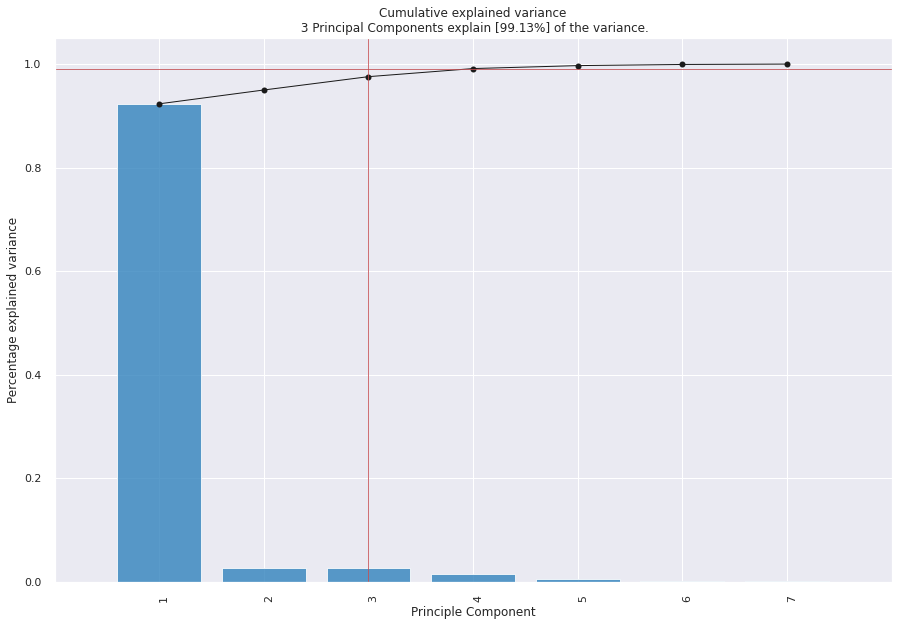

<Figure size 504x360 with 0 Axes>

In [368]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


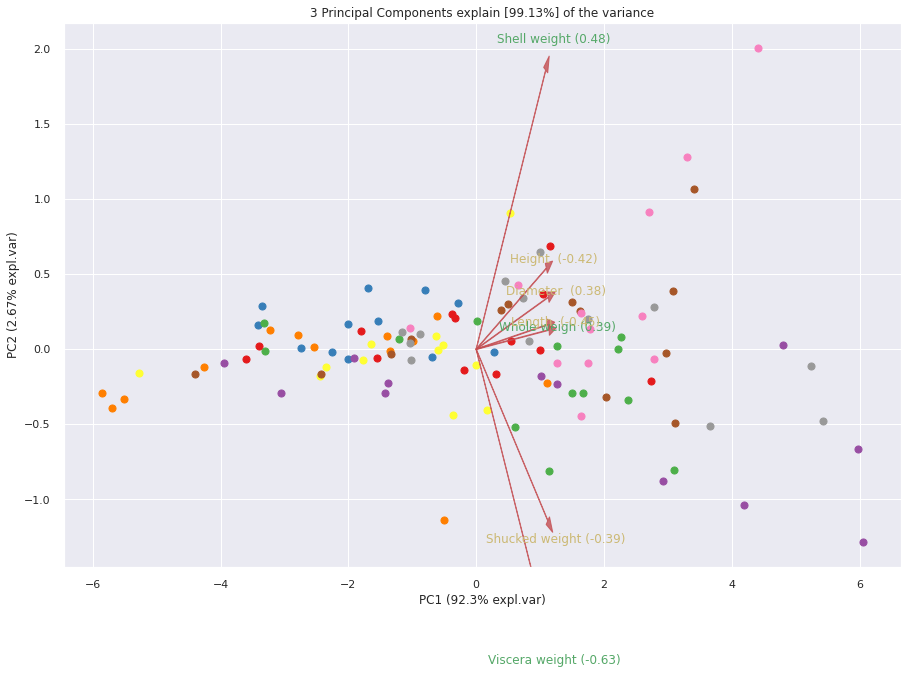

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb8af8afd0>)

In [369]:
model.biplot(label=False, legend=False)

In [370]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [371]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (102, 8)
Unseen Data For Predictions: (11, 8)


In [372]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description                          Value
0                               session_id                            123
1                                   Target                          class
2                              Target Type                     Multiclass
3                            Label Encoded  Female: 0, Infant: 1, Male: 2
4                            Original Data                       (102, 8)
5                           Missing Values                          False
6                         Numeric Features                              7
7                     Categorical Features                              0
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                        (71, 7)
12                    Transformed Test Set                        (31, 7)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           9c74
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                          False
30                        Normalize Method                           None
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                          False
34                              PCA Method                           None
35                          PCA Components                           None
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                          False
41                      Outliers Threshold                           None
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

In [373]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.6482  0.7125  0.6889  0.6263   
gbc          Gradient Boosting Classifier    0.6054  0.6579  0.6333  0.5913   
lightgbm  Light Gradient Boosting Machine    0.6054  0.6706  0.6556  0.5756   
lr                    Logistic Regression    0.5464  0.6732  0.5778  0.5227   
svm                   SVM - Linear Kernel    0.5357  0.0000  0.5944  0.3857   
nb                            Naive Bayes    0.5321  0.7236  0.6167  0.5356   
qda       Quadratic Discriminant Analysis    0.5232  0.6587  0.5333  0.5349   
ridge                    Ridge Classifier    0.5196  0.0000  0.5722  0.4866   
rf               Random Forest Classifier    0.5196  0.6268  0.5889  0.5035   
lda          Linear Discriminant Analysis    0.5054  0.6701  0.5722  0.5080   
et                 Extra Trees Classifier    0.4768  0.6170  0.5556  0.4477   
knn                K Neighbors Classifier    0.4500  0.5821  0.5333  0.4426   
ada                  Ada Boost Classifier    0.4339  0.5559  0.3778  0.3235   
dummy                    Dummy Classifier    0.4089  0.5000  0.3333  0.1692   

              F1   Kappa     MCC  TT (Sec)  
dt        0.6077  0.4385  0.4705     0.016  
gbc       0.5693  0.3640  0.3816     0.201  
lightgbm  0.5692  0.3610  0.3841     0.066  
lr        0.5235  0.2495  0.2505     0.318  
svm       0.4216  0.2442  0.3369     0.064  
nb        0.5090  0.2636  0.2775     0.017  
qda       0.4975  0.2174  0.2342     0.016  
ridge     0.4903  0.2170  0.2153     0.013  
rf        0.4960  0.2283  0.2447     0.462  
lda       0.4875  0.1945  0.2067     0.015  
et        0.4504  0.1552  0.1623     0.450  
knn       0.4371  0.1118  0.1147     0.114  
ada       0.3634  0.0496  0.0499     0.097  
dummy     0.2389  0.0000  0.0000     0.012

In [199]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.5833  0.6111  0.5278  0.5000  0.2174  0.2273
1       0.5000  0.5833  0.6111  0.5278  0.5000  0.2174  0.2273
2       0.5000  0.5417  0.3889  0.4167  0.4524  0.1000  0.1066
3       0.5000  0.5000  0.3333  0.2500  0.3333  0.0000  0.0000
4       0.6667  0.7083  0.7222  0.6667  0.6667  0.4545  0.4545
5       0.6667  0.7500  0.7778  0.8333  0.6389  0.5000  0.6030
6       0.5000  0.6083  0.5556  0.4167  0.4444  0.2174  0.2273
7       0.6667  0.7500  0.6667  0.6667  0.6667  0.5000  0.5000
8       0.6000  0.6667  0.6667  0.6000  0.6000  0.3750  0.3750
9       0.2000  0.3333  0.3333  0.2000  0.2000 -0.2500 -0.2500
Mean    0.5300  0.6025  0.5667  0.5106  0.5002  0.2332  0.2471
SD      0.1320  0.1209  0.1528  0.1853  0.1442  0.2276  0.2406

In [201]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [202]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3333  0.6319  0.5000  0.2500  0.2778  0.0000  0.0000
1       0.3333  0.5208  0.4444  0.2500  0.2778 -0.0435 -0.0455
2       0.5000  0.4861  0.4444  0.4167  0.4222  0.1818  0.2132
3       0.3333  0.3681  0.2778  0.2778  0.3000 -0.1429 -0.1508
4       0.6667  0.7153  0.7222  0.6667  0.6667  0.4545  0.4545
5       0.8333  0.8056  0.8889  0.8889  0.8333  0.7391  0.7727
6       0.6667  0.7056  0.7222  0.7500  0.6778  0.5000  0.5222
7       0.6667  0.6667  0.6667  0.6667  0.6667  0.5000  0.5000
8       0.8000  0.9333  0.8333  0.8667  0.7867  0.6875  0.7350
9       0.6000  0.5667  0.6667  0.6000  0.6000  0.3750  0.3750
Mean    0.5733  0.6400  0.6167  0.5633  0.5509  0.3252  0.3376
SD      0.1800  0.1554  0.1833  0.2356  0.2023  0.2940  0.3062

In [203]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')